In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
data = pd.read_csv('data.csv', sep=',', names=['sex', 'length', 'diameter', 'height', 'whole weight', 
                           'shucked weight', 'viscera weight', 'shell weight', 'rings'])

In [54]:
df = pd.DataFrame(data)

In [55]:
print(df)

     sex  length  diameter  height  whole weight  shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      viscera weight  shell weight  rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3      

In [15]:
sexCount = df.groupby('sex').agg(count=('sex', 'count'))
sexPercentage = sexCount.apply(lambda x: round(100 * x / float(x.sum()),2)).rename(columns={'count': '%'})

result1 = sexCount.merge(sexPercentage, on='sex', how='left').sort_index(ascending=False).rename(index={'M':'Male','I':'Infant','F':'Female'})
print(result1)

        count      %
sex                 
Male     1528  36.58
Infant   1342  32.13
Female   1307  31.29


In [43]:
result2 = df.describe().drop('count').T
result2.index = result2.index.str.capitalize()
print(result2)

                    mean       std     min     25%     50%     75%      max
Length          0.523992  0.120093  0.0750  0.4500  0.5450   0.615   0.8150
Diameter        0.407881  0.099240  0.0550  0.3500  0.4250   0.480   0.6500
Height          0.139516  0.041827  0.0000  0.1150  0.1400   0.165   1.1300
Whole weight    0.828742  0.490389  0.0020  0.4415  0.7995   1.153   2.8255
Shucked weight  0.359367  0.221963  0.0010  0.1860  0.3360   0.502   1.4880
Viscera weight  0.180594  0.109614  0.0005  0.0935  0.1710   0.253   0.7600
Shell weight    0.238831  0.139203  0.0015  0.1300  0.2340   0.329   1.0050
Rings           9.933684  3.224169  1.0000  8.0000  9.0000  11.000  29.0000


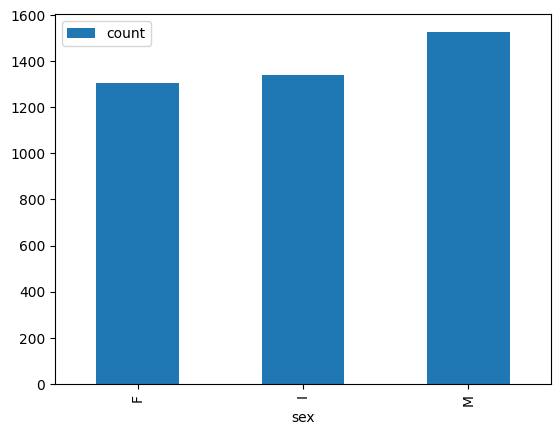

In [94]:
sexCount.plot.bar();

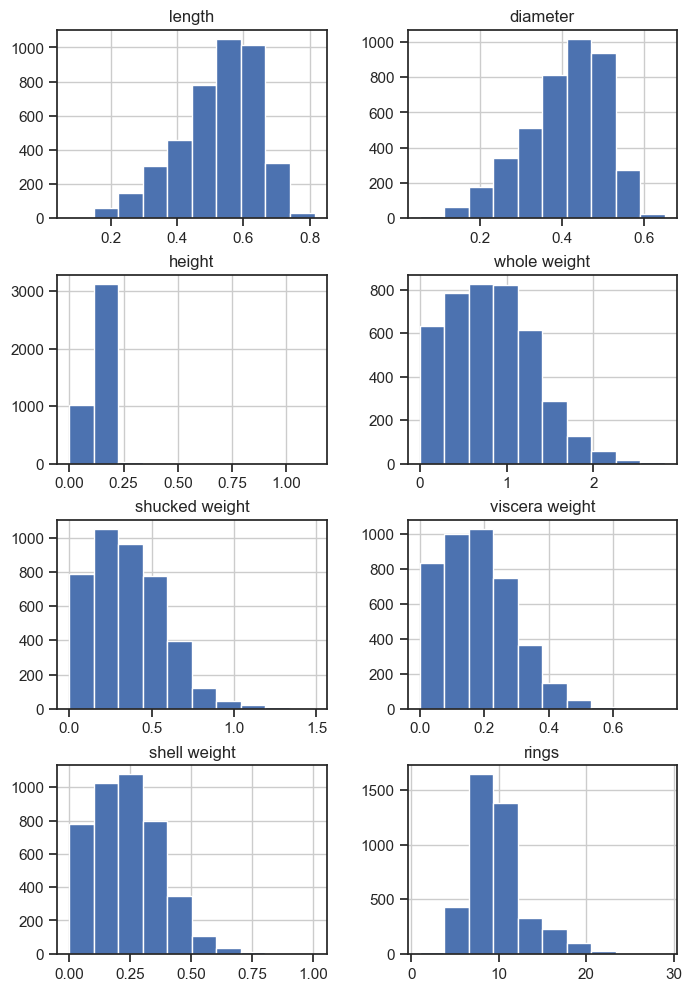

In [152]:
quantitative_vars = ['length', 'diameter', 'height', 'whole weight', 'shucked weight', 'viscera weight', 'shell weight', 'rings']
df[quantitative_vars].hist(figsize=(8,12), layout=(4,2));

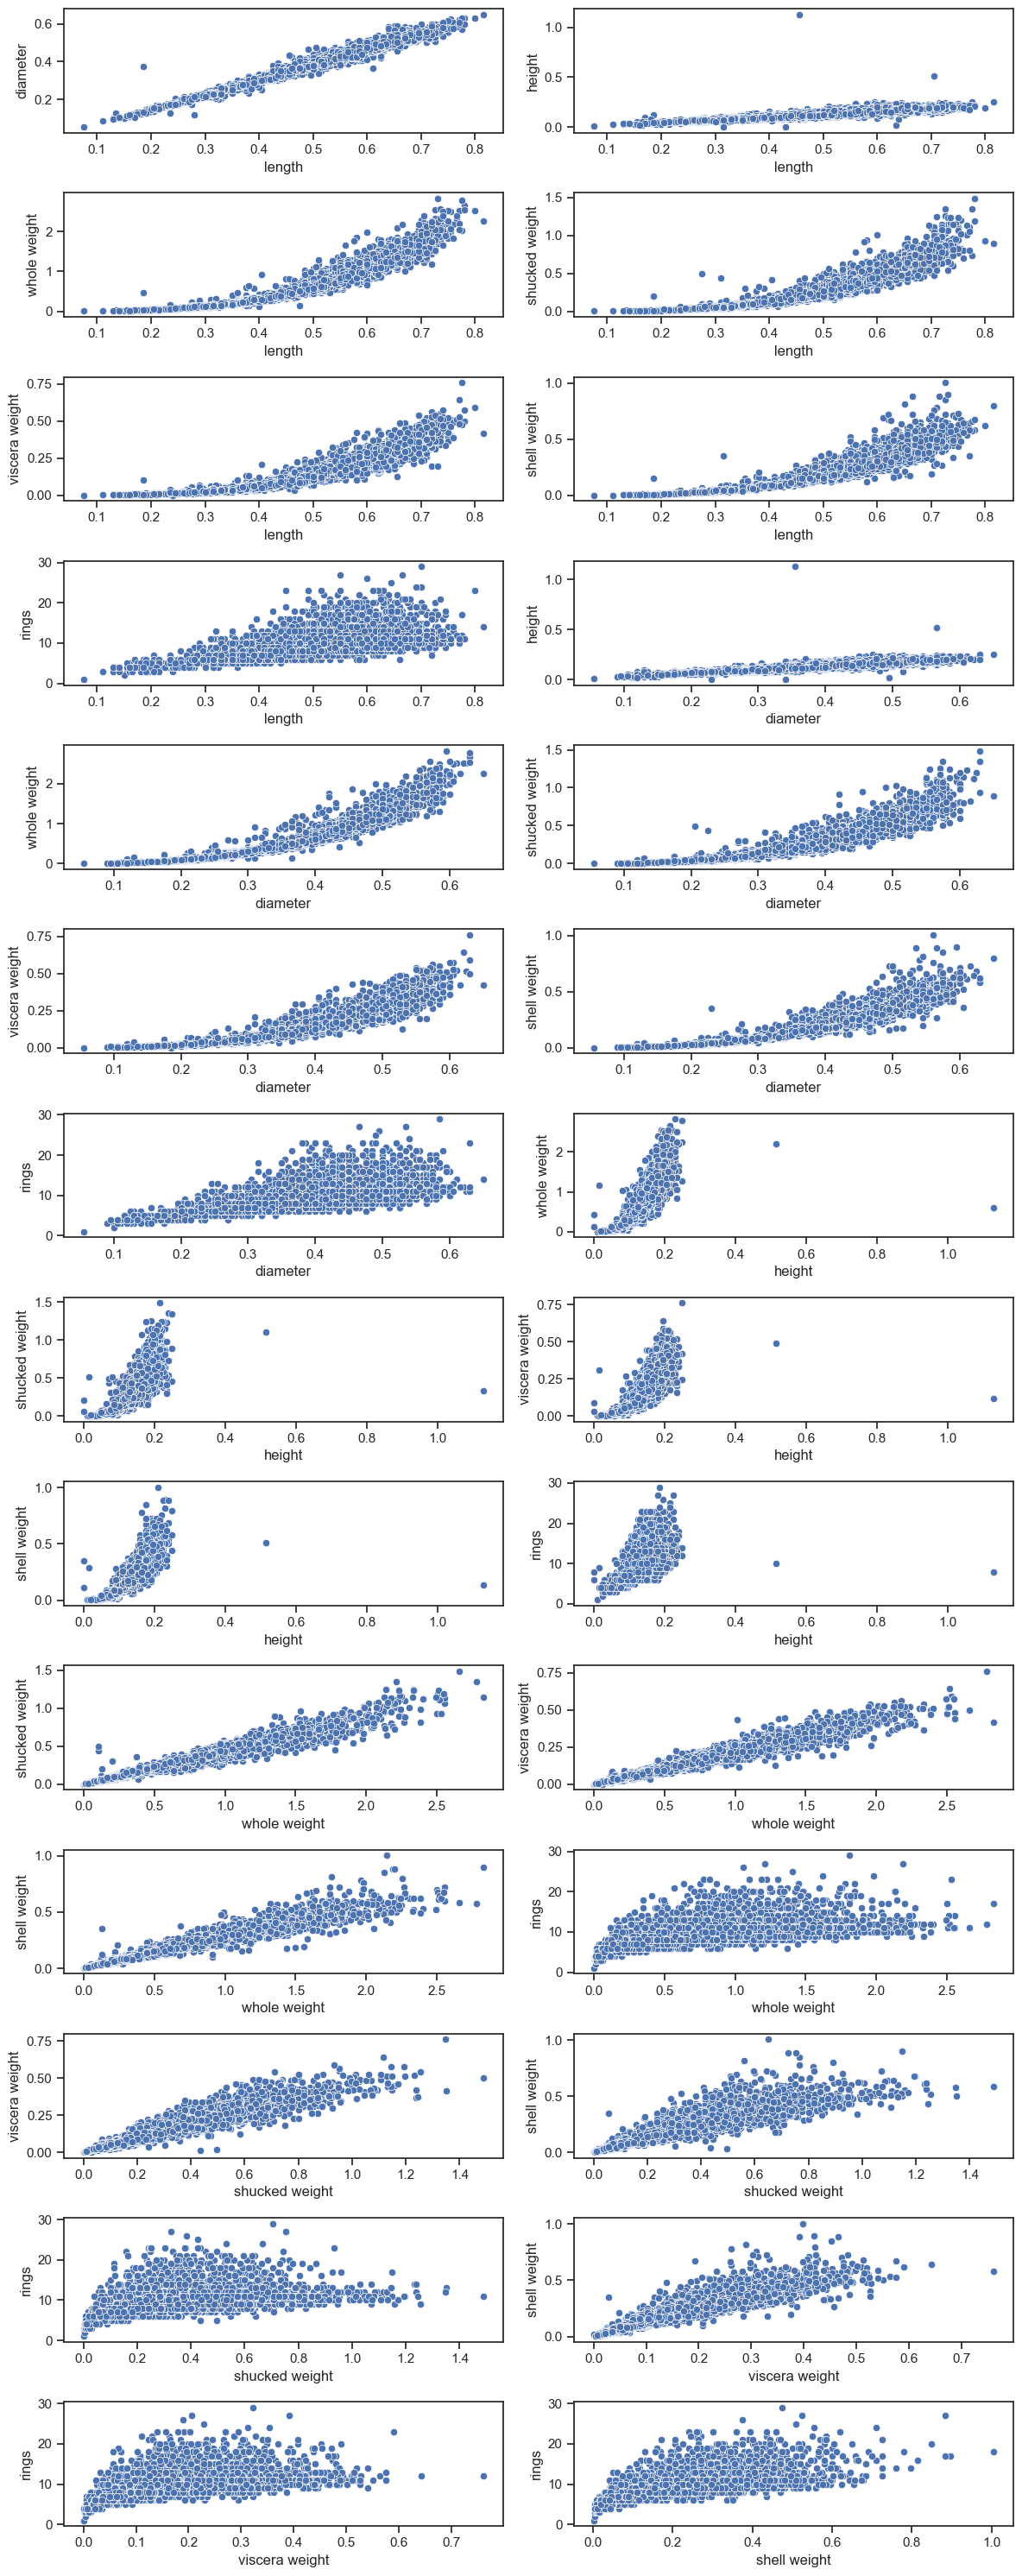

In [154]:
fig, axes = plt.subplots(14, 2, figsize=(12, 30))

k = 0
for i in range(len(quantitative_vars)):
    for j in range(i+1, len(quantitative_vars)):
        x = quantitative_vars[i]
        y = quantitative_vars[j]
        ax = axes[k // 2, k % 2]  # Set the current axis
        k += 1
        sns.scatterplot(data=data, x=x, y=y, ax=ax)
        ax.set_xlabel(x)
        ax.set_ylabel(y)

plt.tight_layout()
plt.show()